In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier


In [2]:
model = joblib.load("outputs/model_rf/rf_model__completo_2025-09-20_16-21-22.sav")
model.classes_

array([0, 1])

In [3]:
X_train = pd.read_csv("outputs/data_outputs/X_train_sample_imp_2025-09-20_16-21-22.csv",index_col=0)
y_train=pd.read_csv("outputs/data_outputs/y_train_sample_2025-09-20_16-21-22.csv",index_col=0)
print(X_train.shape , y_train.shape)

(4085, 1451) (4085, 1)


In [4]:
df_cluster=pd.read_csv("outputs/segmentacion/model_2_completo_cluster_5_2025-09-20_16-21-22.csv",index_col=0)
df_cluster

,cluster,original_class
195,0,0
231,2,0
291,4,1
356,0,0
621,2,0
...,...,...
977180,3,1
977956,2,0
978204,4,1
978209,0,0


In [5]:
cluster_distribucion=pd.read_csv("outputs/segmentacion/model_2_completo_cluster_distribution_5_2025-09-20_16-21-22.csv")
cluster_distribucion

,cluster,0,1,average_prob_baja
0,0,985,59,0.024815
1,1,304,590,0.311128
2,2,570,182,0.088246
3,3,44,574,0.791193
4,4,97,680,0.588194


In [6]:
n_por_cluster = cluster_distribucion[["0","1"]].sum(axis=1)
cluster_distribucion["ratio"] = cluster_distribucion["1"]/n_por_cluster
cluster_distribucion

,cluster,0,1,average_prob_baja,ratio
0,0,985,59,0.024815,0.056513
1,1,304,590,0.311128,0.659955
2,2,570,182,0.088246,0.242021
3,3,44,574,0.791193,0.928803
4,4,97,680,0.588194,0.875161


In [7]:
df=X_train.copy()
df["cluster"] = df_cluster["cluster"]

In [8]:
# sacar las features más importantes
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_series = pd.Series(importances, index=feature_names)

feature_selected = feature_importance_series.sort_values(ascending=False)

n_top = 20 # cantidad de variables a evaluar.
top_overall_features = feature_selected.head(n_top).index.tolist()

# cluster_series_aligned = pd.Series(clusters, index=Xtrain_rf.index)

cluster_median_values = {}

for cluster in sorted(df_cluster["cluster"].unique()):
    cluster_indices = df_cluster[df_cluster["cluster"] ==cluster ].index
    cluster_data = X_train.loc[cluster_indices, top_overall_features]

    # Usar el estadístico de su preferencia
    values = cluster_data.median()
    cluster_median_values[f'Cluster {cluster}'] = values

top_overall_features_df = pd.DataFrame(cluster_median_values)
display(top_overall_features_df)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
ctrx_quarter,121.0000,53.000,111.5000,3.000,14.00
MAX_ctrx_quarter,138.0000,71.000,129.5000,6.000,21.00
ctrx_quarter_lag_1,121.0000,58.000,112.0000,3.000,16.00
MAX_mpasivos_margen,1508.9650,683.920,1538.9900,9.315,95.83
MIN_ctrx_quarter,106.0000,42.000,93.5000,0.000,11.00
ctrx_quarter_lag_2,121.0000,60.500,112.0000,3.000,17.00
MAX_mcaja_ahorro,67785.6250,23332.615,53019.8200,0.000,1299.34
mcaja_ahorro,31584.6400,7203.225,20553.7800,0.000,47.01
ratio_mcaja_ahorro_ccaja_ahorro,15661.7975,3299.575,9597.0325,0.000,23.13
mpasivos_margen,757.7650,264.115,828.8400,2.430,22.30


In [9]:
def compare_cluster_stats(data, df_cluster, variable_name, target_cluster):

    variable_data = data[variable_name]

    target_cluster_indices = df_cluster[df_cluster["cluster"] == target_cluster].index
    target_cluster_data = variable_data.loc[target_cluster_indices] # Keep NaNs for counting

    rest_indices =  df_cluster[df_cluster["cluster"] != target_cluster].index
    rest_data = variable_data.loc[rest_indices] # Keep NaNs for counting

    target_cluster_desc = target_cluster_data.dropna().describe()
    rest_desc = rest_data.dropna().describe()

    summary_df = pd.DataFrame({
        f'Cluster {target_cluster}': target_cluster_desc,
        f'Rest of Clusters': rest_desc
    })

    summary_df.loc['unique'] = [target_cluster_data.nunique(), rest_data.nunique()]
    summary_df.loc['missing'] = [target_cluster_data.isnull().sum(), rest_data.isnull().sum()]

    return summary_df

print(f"'mcaja_ahorro' - Cluster 2 vs. Rest")
compare_cluster_stats(X_train, df_cluster, 'mpayroll', 4)



'mcaja_ahorro' - Cluster 2 vs. Rest


,Cluster 4,Rest of Clusters
count,777.000000,3.308000e+03
mean,820.297181,5.214103e+04
std,10846.261368,1.656699e+05
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,7.514430e+04
max,263817.080000,6.044532e+06
unique,18.000000,1.166000e+03
missing,0.000000,0.000000e+00


In [10]:
important_features_by_cluster = {}

for cluster in sorted(df_cluster["cluster"].unique()):
    print(f"Training model for Cluster {cluster} vs. Rest...")
    y_binary = (df_cluster["cluster"] == cluster).astype(int)

    model = RandomForestClassifier(n_estimators=100, random_state=17, class_weight='balanced') # Added class_weight for imbalanced data
    model.fit(X_train, y_binary)

    importances = model.feature_importances_
    feature_names = X_train.columns

    indices = np.argsort(importances)[::-1]

    important_features_by_cluster[cluster] = [feature_names[i] for i in indices]

Training model for Cluster 0 vs. Rest...
Training model for Cluster 1 vs. Rest...
Training model for Cluster 2 vs. Rest...
Training model for Cluster 3 vs. Rest...
Training model for Cluster 4 vs. Rest...


In [11]:
for k in range(5):
    print(k)
    print(important_features_by_cluster[k][:20])

0
['MIN_cpayroll_trx', 'MIN_mpayroll', 'mpayroll_lag_1', 'MAX_mpayroll', 'mpayroll_lag_2', 'mpayroll', 'cpayroll_trx_lag_1', 'cpayroll_trx_lag_2', 'MAX_cpayroll_trx', 'MAX_mcomisiones_mantenimiento', 'cpayroll_trx', 'slope_mcomisiones_mantenimiento', 'MAX_ccomisiones_mantenimiento', 'mcomisiones_mantenimiento', 'delta_2_mpayroll', 'delta_2_mcomisiones_mantenimiento', 'mautoservicio', 'mcomisiones_mantenimiento_lag_1', 'MAX_ctarjeta_debito_transacciones', 'mautoservicio_lag_1']
1
['MAX_ctrx_quarter', 'ctrx_quarter', 'slope_mcomisiones_mantenimiento', 'mpayroll_lag_2', 'MIN_cpayroll_trx', 'MIN_mpayroll', 'ctrx_quarter_lag_1', 'MIN_ctrx_quarter', 'ctrx_quarter_lag_2', 'MAX_mpayroll', 'mpayroll', 'mpayroll_lag_1', 'MAX_cpayroll_trx', 'mcaja_ahorro', 'MAX_mpasivos_margen', 'delta_2_mcomisiones_mantenimiento', 'ratio_mcaja_ahorro_ccaja_ahorro', 'MAX_mcuentas_saldo', 'MAX_mcaja_ahorro', 'mcaja_ahorro_lag_1']
2
['MIN_cpayroll_trx', 'MIN_mpayroll', 'mtarjeta_visa_consumo', 'MIN_mtarjeta_visa_co

----------

In [ ]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]


-----------------

### EDAD

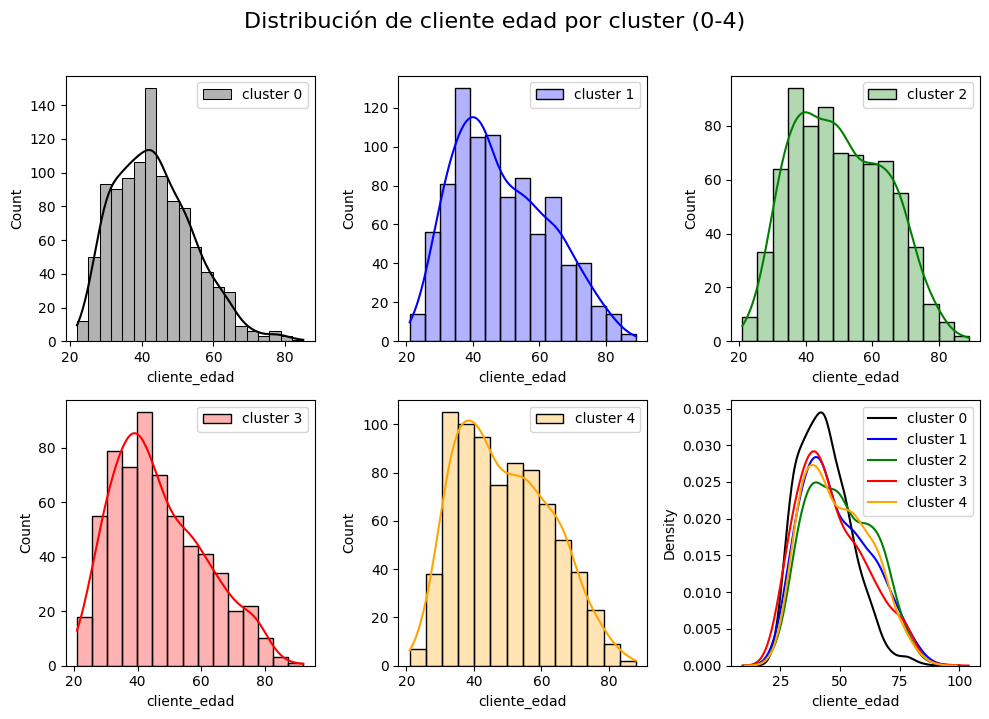

In [78]:
fig,axes=plt.subplots(2,3,figsize=(10,7))
colors=["black","blue","green","red","orange"]
alfa=0.3
axes=axes.flatten()

# Histogramas separados
for k,c in enumerate(colors):
    ax=axes[k]
    f=df["cluster"]==k
    sns.histplot(
        data=df.loc[f],
        x="cliente_edad",
        color=c,
        alpha=alfa,
        ax=ax,
        label=f"cluster {k}",
        kde=True
    )
    ax.legend()

# Último recuadro: todos juntos
ax=axes[-1]
for k,c in enumerate(colors):
    f=df["cluster"]==k
    sns.kdeplot(
        data=df.loc[f],
        x="cliente_edad",
        color=c,
        alpha=1,
        ax=ax,
        label=f"cluster {k}"
    )
ax.legend()

fig.suptitle("Distribución de cliente edad por cluster (0-4)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


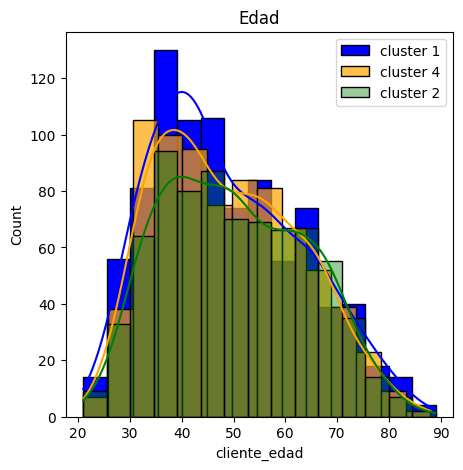

In [50]:
fig,ax=plt.subplots(figsize=(5,5))
colors=["blue","orange","green"]
clusters=[1,4,2]
alfa=1
for k,c in zip(clusters,colors):

    f=df["cluster"]==k
    sns.histplot(data = df.loc[f] , x="cliente_edad" ,color=c ,ax=ax , alpha=alfa, label=f"cluster {k}",kde=True)
    ax.legend()
    alfa-=0.3
plt.title("Edad")
plt.show()

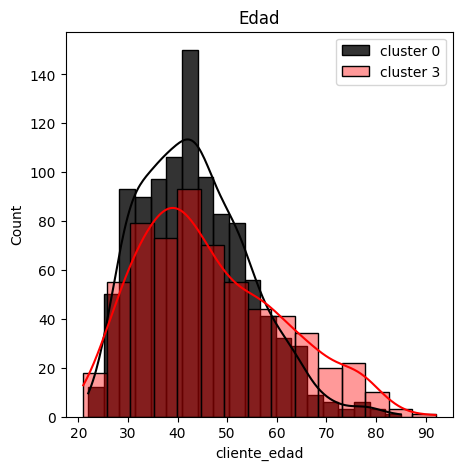

In [53]:
fig,ax=plt.subplots(figsize=(5,5))
colors=["black","red"]
clusters=[0,3]
alfa=0.8
for k,c in zip(clusters,colors):

    f=df["cluster"]==k
    sns.histplot(data = df.loc[f] , x="cliente_edad" ,color=c ,ax=ax , alpha=alfa, label=f"cluster {k}",kde=True)
    ax.legend()
    alfa-=0.4
plt.title("Edad")
plt.show()


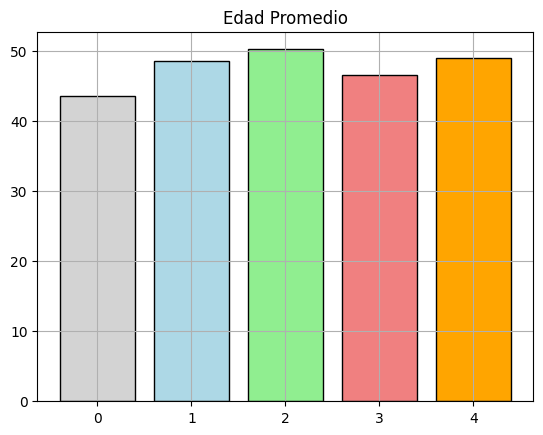

In [170]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["cliente_edad"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("Edad Promedio")
plt.grid(True)

------------------

### SEGUROS

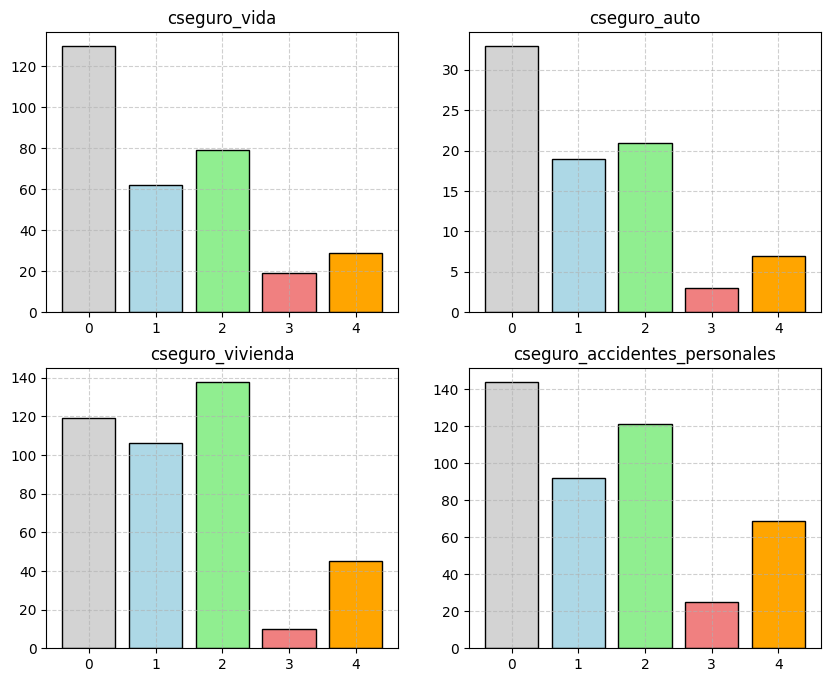

In [154]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]

seguros = ["cseguro_vida","cseguro_auto","cseguro_vivienda","cseguro_accidentes_personales"]
clusters=[0,1,2,3,4]
axes=axes.flatten()
for i,s in enumerate(seguros):
    ax=axes[i]
    seguros_vida=df.groupby("cluster")[s].sum()
    ax.bar(clusters , seguros_vida.values,color=colors,edgecolor="black")
    ax.grid(True, linestyle="--", alpha=0.6) 
    ax.set_title(s)


-------

### CLIENTE ANTIGUEDAD























































































































































































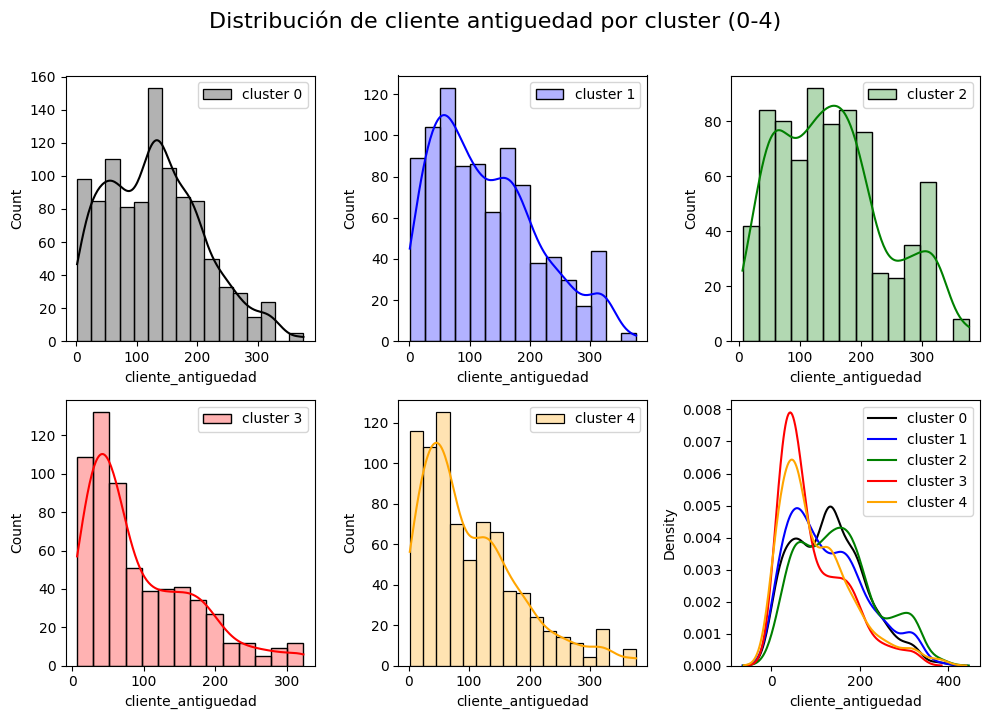

In [76]:
fig,axes=plt.subplots(2,3,figsize=(10,7))
colors=["black","blue","green","red","orange"]
alfa=0.3
axes=axes.flatten()

# Histogramas separados
for k,c in enumerate(colors):
    ax=axes[k]
    f=df["cluster"]==k
    sns.histplot(
        data=df.loc[f],
        x="cliente_antiguedad",
        color=c,
        alpha=alfa,
        ax=ax,
        label=f"cluster {k}",
        kde=True
    )
    ax.legend()

# Último recuadro: todos juntos
ax=axes[-1]
for k,c in enumerate(colors):
    f=df["cluster"]==k
    sns.kdeplot(
        data=df.loc[f],
        x="cliente_antiguedad",
        color=c,
        alpha=1,
        ax=ax,
        label=f"cluster {k}",
    )
ax.legend()

fig.suptitle("Distribución de cliente antiguedad por cluster (0-4)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


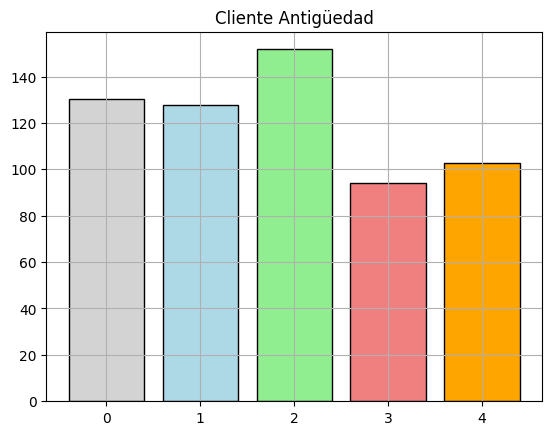

In [171]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["cliente_antiguedad"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("Cliente Antigüedad")
plt.grid(True)

---------------

### CPAYROLL


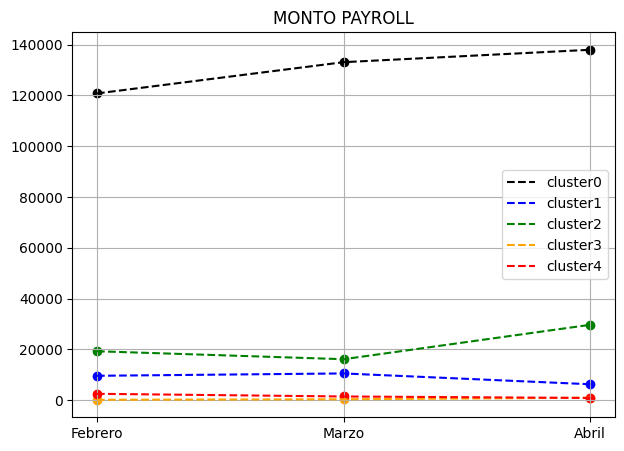

In [70]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","orange","red"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mpayroll_lag_2","mpayroll_lag_1","mpayroll"]].mean(axis=0)
    ax.scatter([0,1,2] ,means,color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("MONTO PAYROLL")
plt.grid(True)

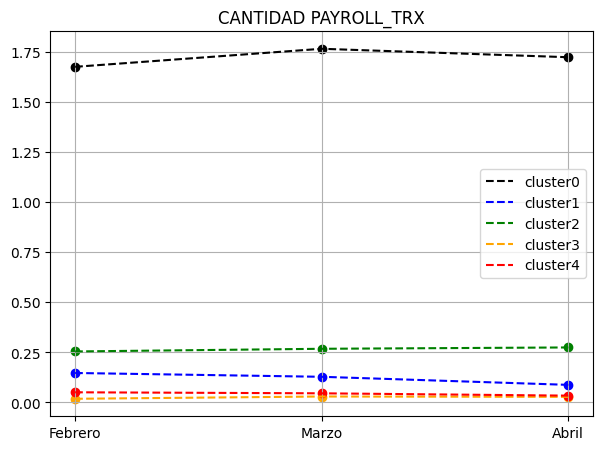

In [71]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","orange","red"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["cpayroll_trx_lag_2","cpayroll_trx_lag_1","cpayroll_trx"]].mean(axis=0)
    ax.scatter([0,1,2] ,means,color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()


plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("CANTIDAD PAYROLL_TRX")
plt.grid(True)

-------

### ctrx_quarter

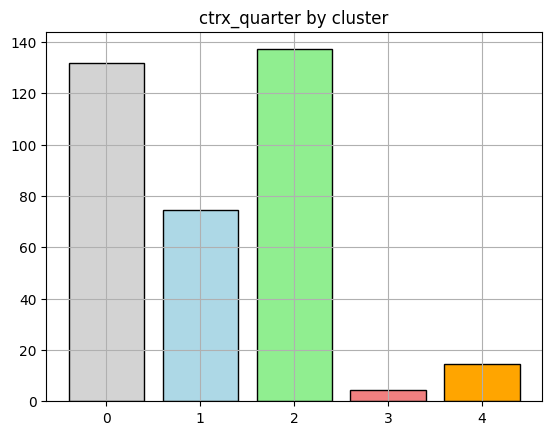

In [129]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
ctrx_quarter_by_cluster=df.groupby("cluster")["ctrx_quarter"].mean()
plt.bar(ctrx_quarter_by_cluster.index,ctrx_quarter_by_cluster.values ,color=colors,edgecolor="black")
plt.title("ctrx_quarter by cluster")
plt.grid(True)

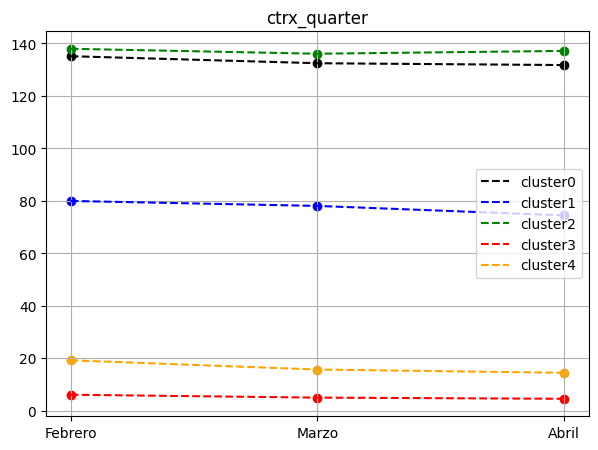

In [172]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["ctrx_quarter_lag_2","ctrx_quarter_lag_1","ctrx_quarter"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("ctrx_quarter")
plt.grid(True)


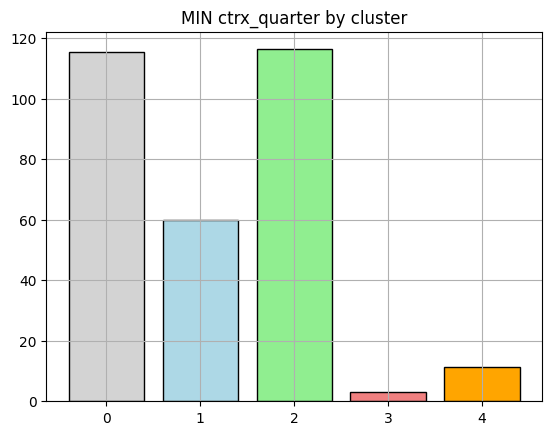

In [174]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
ctrx_quarter_by_cluster=df.groupby("cluster")["MIN_ctrx_quarter"].mean()
plt.bar(ctrx_quarter_by_cluster.index,ctrx_quarter_by_cluster.values ,color=colors,edgecolor="black")
plt.title("MIN ctrx_quarter by cluster")
plt.grid(True)

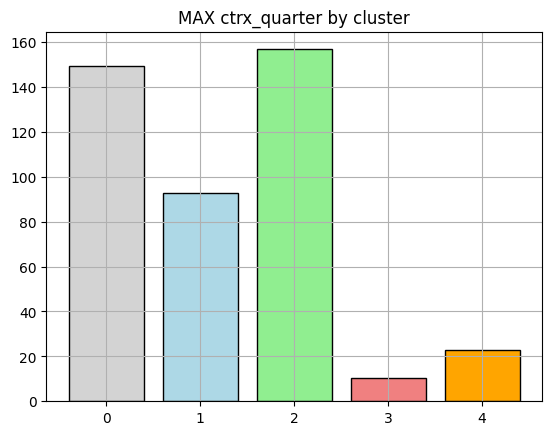

In [175]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
ctrx_quarter_by_cluster=df.groupby("cluster")["MAX_ctrx_quarter"].mean()
plt.bar(ctrx_quarter_by_cluster.index,ctrx_quarter_by_cluster.values ,color=colors,edgecolor="black")
plt.title("MAX ctrx_quarter by cluster")
plt.grid(True)

-------------

### Transacciones emitidas y recibidas

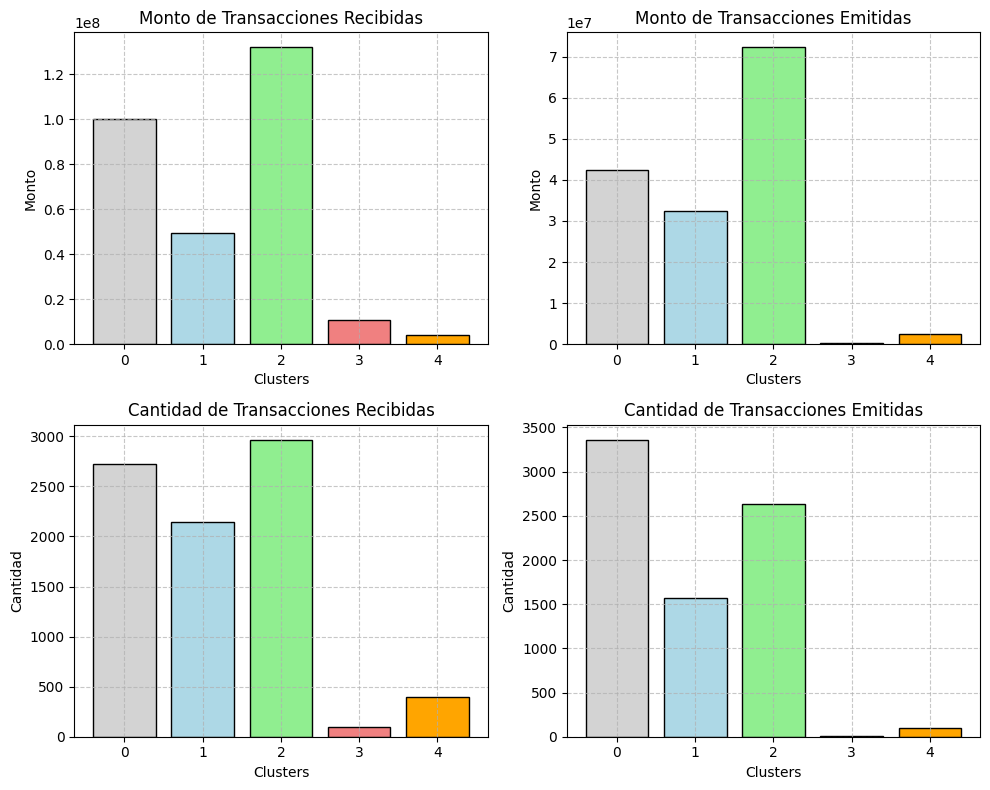

In [145]:
features = ["Monto","Cantidad"]
features_letra=["m","c"]
acciones=["Transacciones Recibidas","Transacciones Emitidas"]
acciones_name=["transferencias_recibidas","transferencias_emitidas"]
fig,axes=plt.subplots(2,2,figsize=(10,8))
axes=axes.flatten()
i=0
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
for f,feat in zip(features_letra,features) : 
    for acc,accion in zip(acciones_name,acciones):
        ax=axes[i]
        total_grupos_by_cluster=df.groupby("cluster")[f"{f+acc}"].sum()
        ax.bar([0,1,2,3,4] ,total_grupos_by_cluster.values ,color=colors, alpha=1 ,edgecolor="black")
        ax.set_title(f"{feat} de {accion}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{feat}")
        ax.grid(True, linestyle="--", alpha=0.7) 
        i+=1
plt.tight_layout()
plt.show()

------------

### AUTOSERVICIO


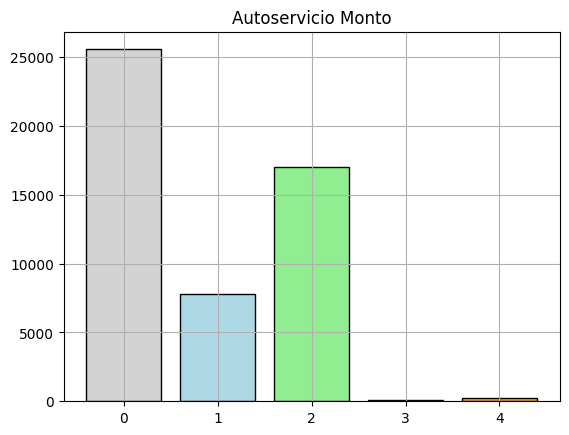

In [180]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
ctrx_quarter_by_cluster=df.groupby("cluster")["mautoservicio"].mean()
plt.bar(ctrx_quarter_by_cluster.index,ctrx_quarter_by_cluster.values ,color=colors,edgecolor="black")
plt.title("Autoservicio Monto")
plt.grid(True)

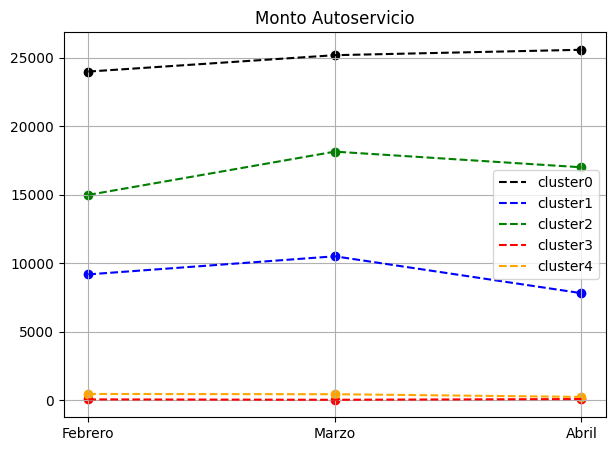

In [182]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mautoservicio_lag_2","mautoservicio_lag_1","mautoservicio"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Monto Autoservicio")
plt.grid(True)

------------

### ctarjeta_debito_transacciones

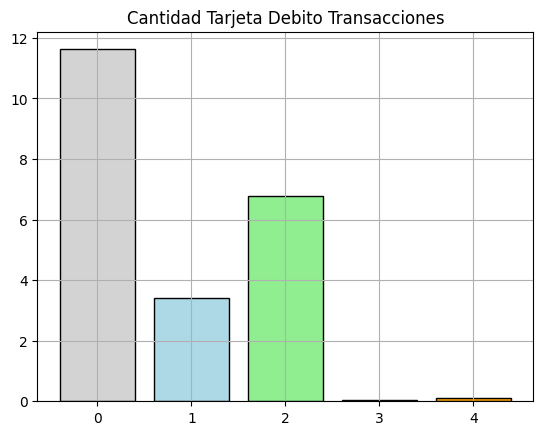

In [183]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
ctrx_quarter_by_cluster=df.groupby("cluster")["ctarjeta_debito_transacciones"].mean()
plt.bar(ctrx_quarter_by_cluster.index,ctrx_quarter_by_cluster.values ,color=colors,edgecolor="black")
plt.title("Cantidad Tarjeta Debito Transacciones")
plt.grid(True)

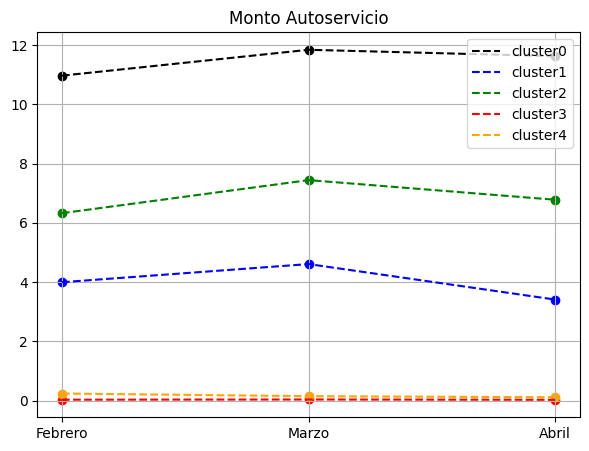

In [184]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["ctarjeta_debito_transacciones_lag_2","ctarjeta_debito_transacciones_lag_1","ctarjeta_debito_transacciones"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Monto Autoservicio")
plt.grid(True)

---------

### CONSUMO CON TARJETAS

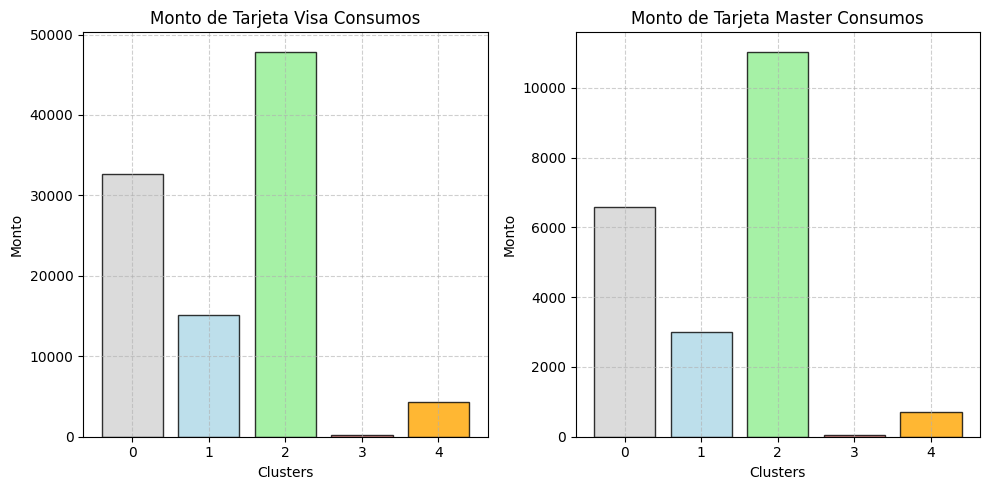

In [155]:
tarjetas = ["tarjeta_visa_consumo","tarjeta_master_consumo"]
tarjetas_name=["Tarjeta Visa Consumos","Tarjeta Master Consumos"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,2,figsize=(10,5))
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]

axes=axes.flatten()
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes[i]
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

------------

### TARJETAS DESCUENTOS

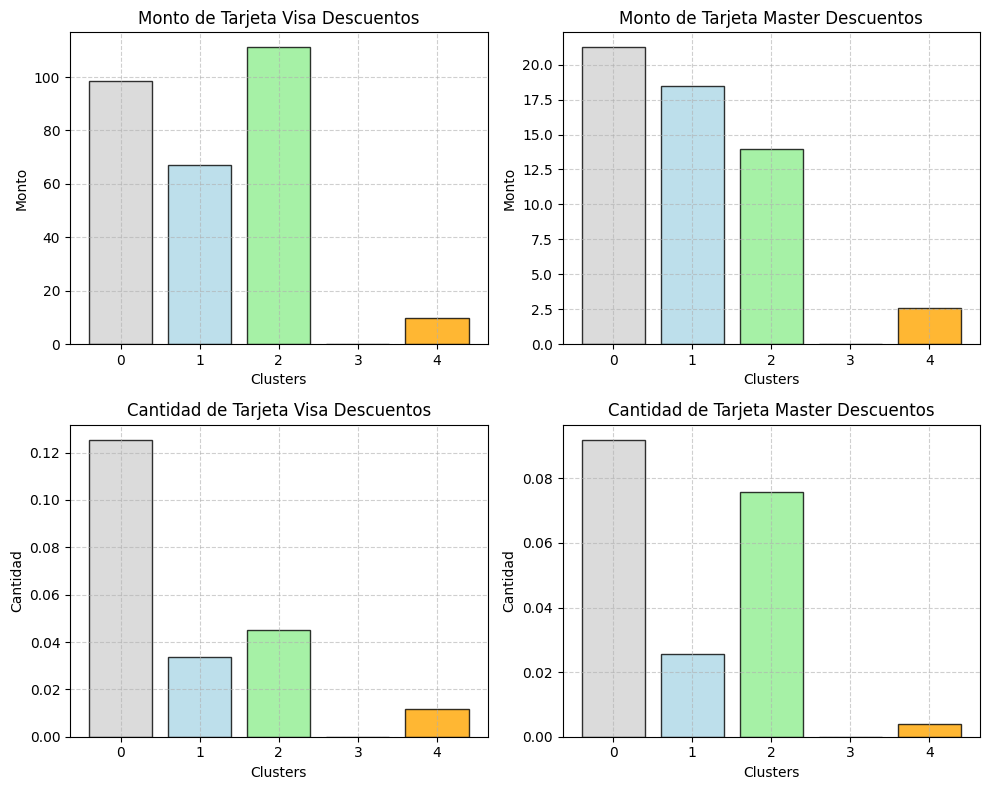

In [133]:
tarjetas = ["tarjeta_visa_descuentos","tarjeta_master_descuentos"]
tarjetas_name=["Tarjeta Visa Descuentos","Tarjeta Master Descuentos"]
accion_letra=["m","c"]
acciones = ["Monto","Cantidad"]
fig,axes=plt.subplots(2,2,figsize=(10,8))
axes=axes.flatten()
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]

i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes[i]
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

------------

### CAJA DE AHORRO


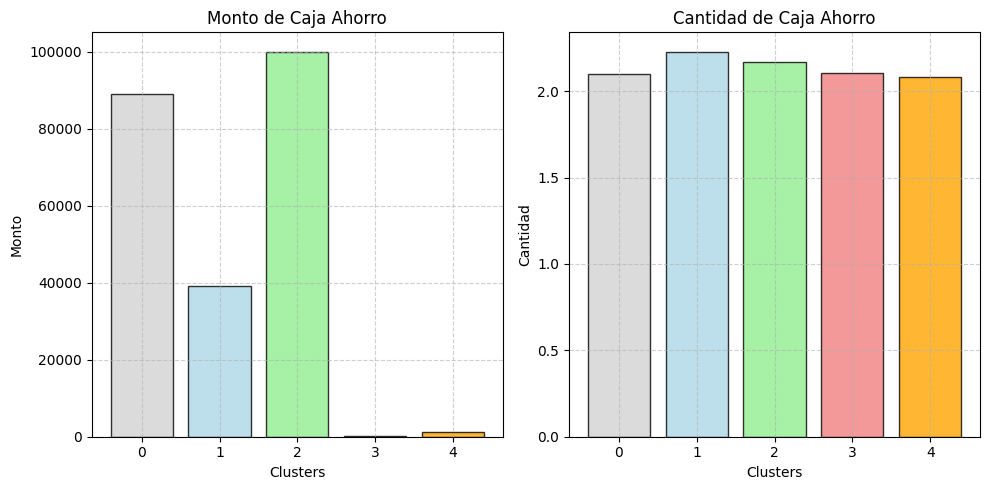

In [135]:
tarjetas = ["caja_ahorro"]
tarjetas_name=["Caja Ahorro"]
accion_letra=["m","c"]
acciones = ["Monto","Cantidad"]
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes=axes.flatten()
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes[i]
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

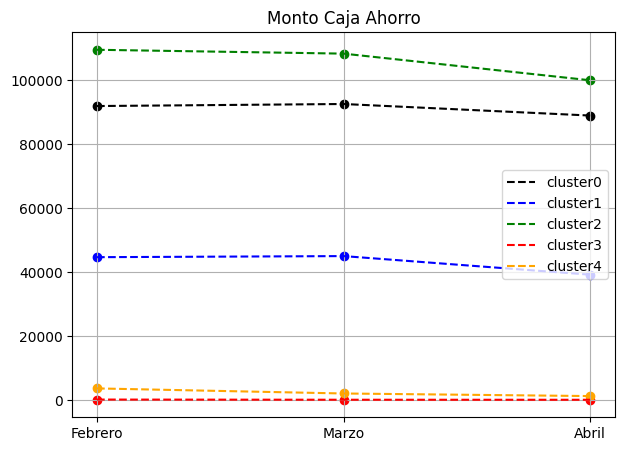

In [159]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mcaja_ahorro_lag_2","mcaja_ahorro_lag_1","mcaja_ahorro"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Monto Caja Ahorro")
plt.grid(True)

---

### Monto Cuenta Corriente

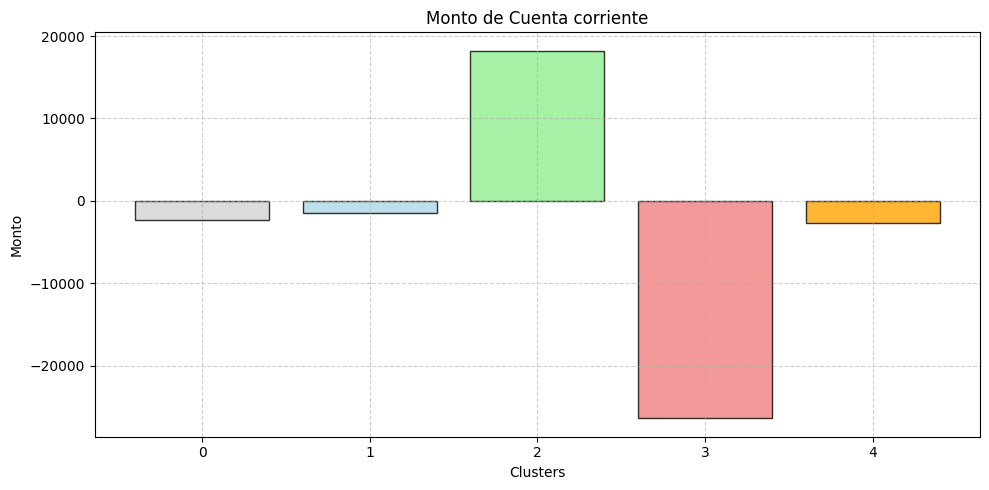

In [162]:
tarjetas = ["cuenta_corriente"]
tarjetas_name=["Cuenta corriente"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,1,figsize=(10,5))
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

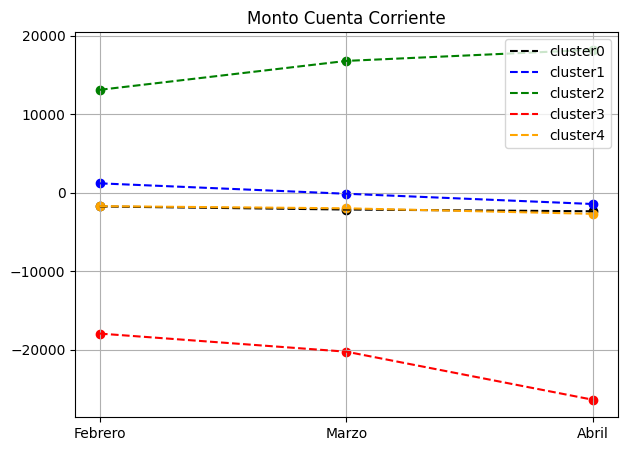

In [163]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mcuenta_corriente_lag_2","mcuenta_corriente_lag_1","mcuenta_corriente"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Monto Cuenta Corriente")
plt.grid(True)

### Cuenta Saldo = Todas las cuentas (inclusive la corriente)

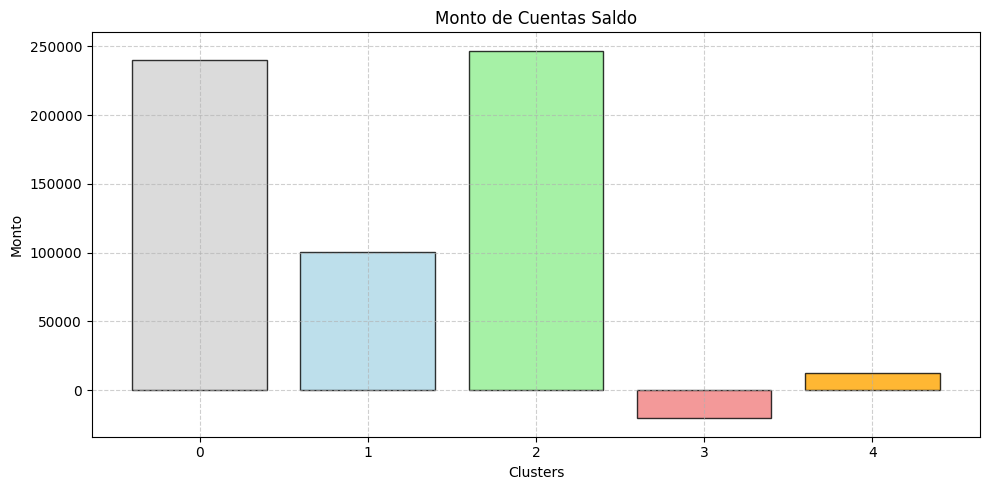

In [164]:
tarjetas = ["cuentas_saldo"]
tarjetas_name=["Cuentas Saldo"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,1,figsize=(10,5))
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

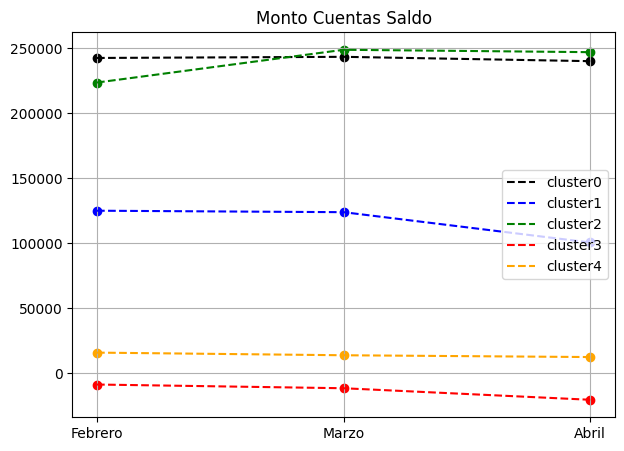

In [166]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mcuentas_saldo_lag_2","mcuentas_saldo_lag_1","mcuentas_saldo"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Monto Cuentas Saldo")
plt.grid(True)

----

### CAJA DE SEGURIDAD

Text(0.5, 1.0, 'Promedio de la cantidad de cajas de seguridad por cluster')

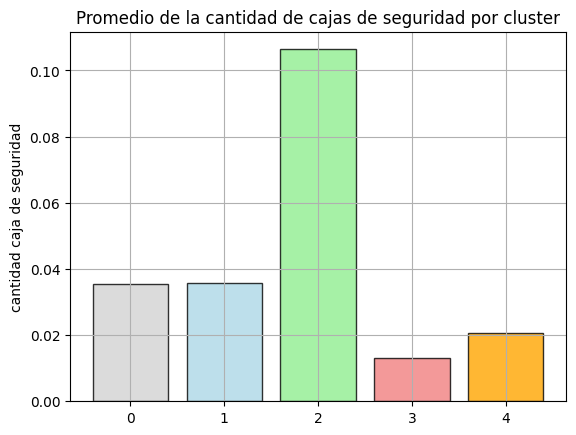

In [ ]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
caja_seg=df.groupby("cluster")["ccaja_seguridad"].mean()
plt.bar([0,1,2,3,4] ,caja_seg.values ,color=colors, alpha=0.8 ,edgecolor="black")
plt.grid(True)
plt.ylabel("cantidad caja de seguridad")
plt.title("Promedio de la cantidad de cajas de seguridad por cluster")

------------------

### RENTABILIDAD

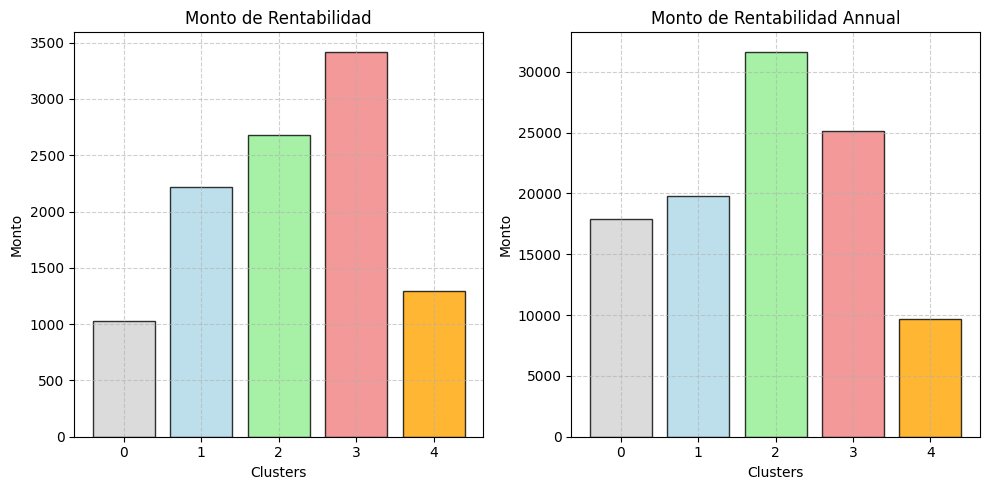

In [137]:
tarjetas = ["rentabilidad","rentabilidad_annual"]
tarjetas_name=["Rentabilidad","Rentabilidad Annual"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes=axes.flatten()
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes[i]
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

------

### PASIVOS MARGEN

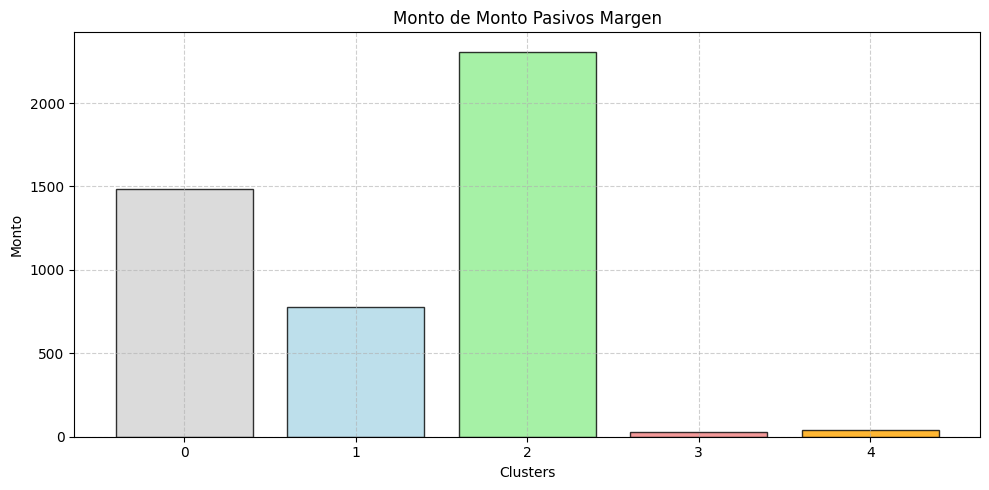

In [177]:
tarjetas = ["pasivos_margen"]
tarjetas_name=["Monto Pasivos Margen"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,1,figsize=(10,5))
# axes=axes.flatten()
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

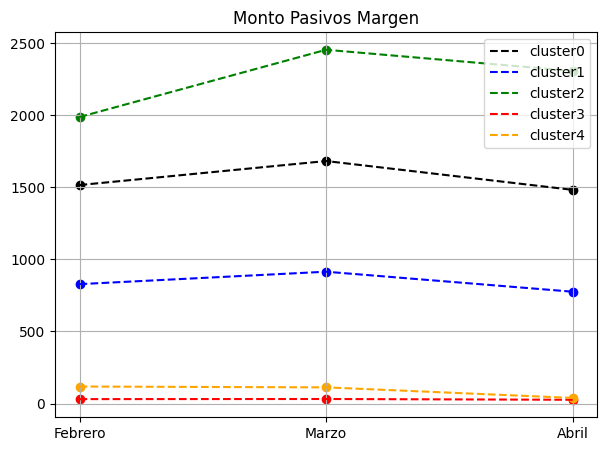

In [179]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mpasivos_margen_lag_2","mpasivos_margen_lag_1","mpasivos_margen"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Monto Pasivos Margen")
plt.grid(True)

----

### COMISIONES TOTALES

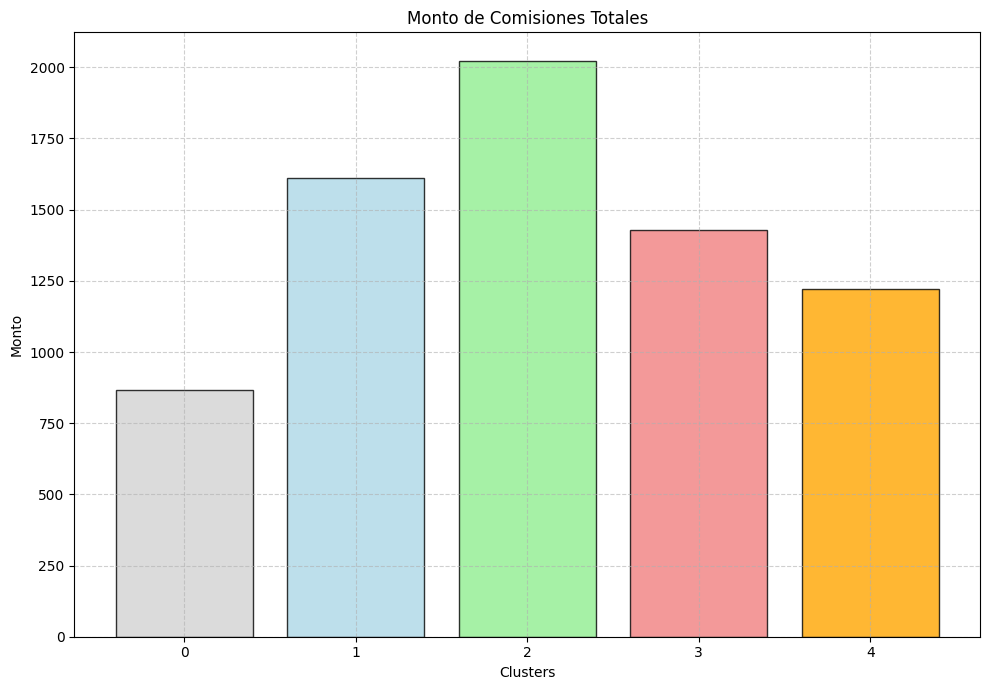

In [147]:
tarjetas = ["comisiones"]
tarjetas_name=["Comisiones Totales"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,1,figsize=(10,7))
i=0
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]

for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

### COMISIONES MANTENIMIENTO

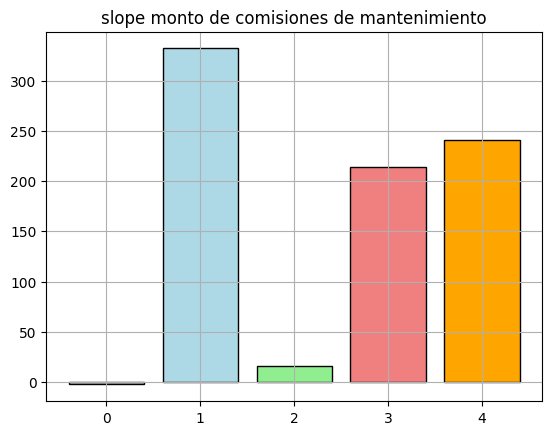

In [156]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
slope_mcomisiones_by_cluster=df.groupby("cluster")["slope_mcomisiones_mantenimiento"].mean()
plt.bar(slope_mcomisiones_by_cluster.index,slope_mcomisiones_by_cluster.values ,color=colors,edgecolor="black")
plt.title("slope monto de comisiones de mantenimiento")
plt.grid(True)

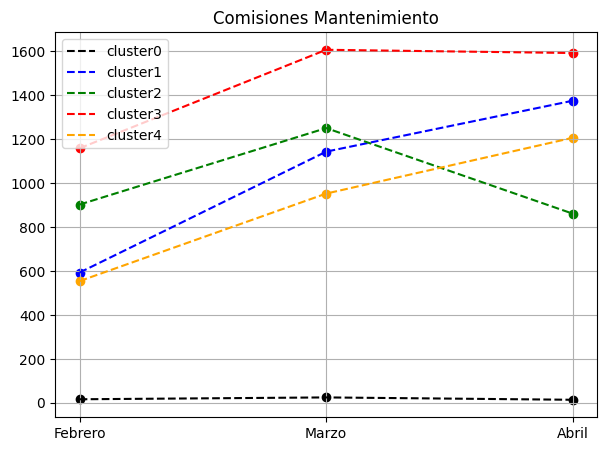

In [142]:
fig,ax=plt.subplots(figsize=(7,5))
colors=["black","blue","green","red","orange"]

for k,c in enumerate(colors):
    f=df["cluster"]==k
    means=df.loc[f,["mcomisiones_mantenimiento_lag_2","mcomisiones_mantenimiento_lag_1","mcomisiones_mantenimiento"]].mean(axis=0)
    ax.scatter([0,1,2] ,means , color=c)
    ax.plot([0,1,2] ,means,color=c,linestyle="--" , label=f"cluster{k}")
    ax.legend()
plt.xticks([0,1,2],["Febrero","Marzo","Abril"])
plt.title("Comisiones Mantenimiento")
plt.grid(True)


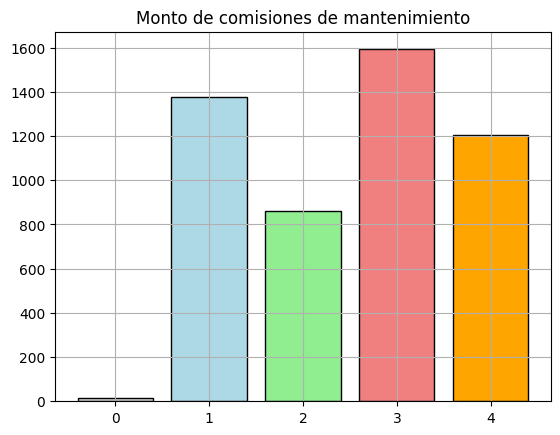

In [148]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["mcomisiones_mantenimiento"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("Monto de comisiones de mantenimiento")
plt.grid(True)

--------

### COMISIONES OTROS

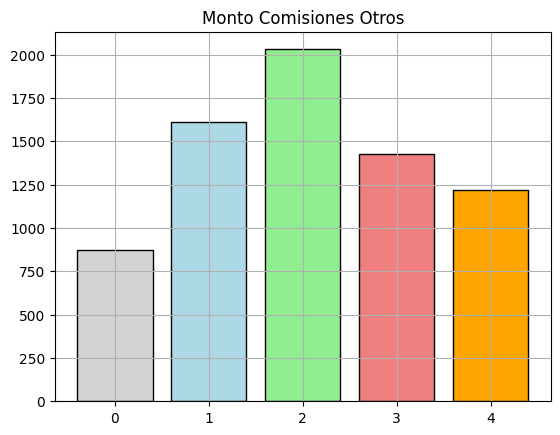

In [149]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["mcomisiones_otras"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("Monto Comisiones Otros")
plt.grid(True)

----------

### PRESTAMOS

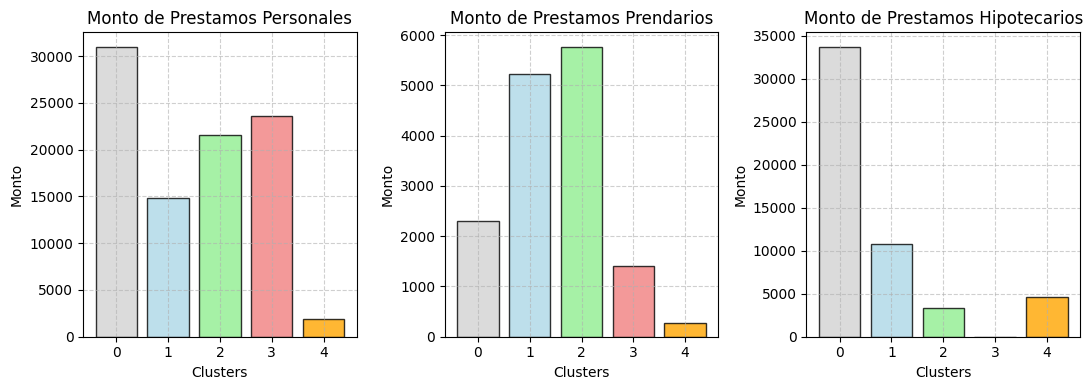

In [139]:
tarjetas = ["prestamos_personales","prestamos_prendarios","prestamos_hipotecarios"]
tarjetas_name=["Prestamos Personales","Prestamos Prendarios","Prestamos Hipotecarios"]
accion_letra=["m"]
acciones = ["Monto"]
fig,axes=plt.subplots(1,3,figsize=(11,4))
axes=axes.flatten()
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
i=0
for ac,accion in zip(accion_letra,acciones) : 
    for t_name, t in zip(tarjetas_name,tarjetas):
        ax=axes[i]
        mean_grupos_by_cluster=df.groupby("cluster")[f"{ac+t}"].mean()
        ax.bar([0,1,2,3,4] ,mean_grupos_by_cluster.values ,color=colors, alpha=0.8 ,edgecolor="black")
        ax.set_title(f"{accion} de {t_name}")
        ax.set_xlabel("Clusters")
        ax.set_ylabel(f"{accion}")
        ax.grid(True, linestyle="--", alpha=0.6) 
        i+=1
plt.tight_layout()
plt.show()

In [157]:
for k in range(5):
    print(k)
    print(important_features_by_cluster[k][:20])

0
['MIN_cpayroll_trx', 'MIN_mpayroll', 'mpayroll_lag_1', 'MAX_mpayroll', 'mpayroll_lag_2', 'mpayroll', 'cpayroll_trx_lag_1', 'cpayroll_trx_lag_2', 'MAX_cpayroll_trx', 'MAX_mcomisiones_mantenimiento', 'cpayroll_trx', 'slope_mcomisiones_mantenimiento', 'MAX_ccomisiones_mantenimiento', 'mcomisiones_mantenimiento', 'delta_2_mpayroll', 'delta_2_mcomisiones_mantenimiento', 'mautoservicio', 'mcomisiones_mantenimiento_lag_1', 'MAX_ctarjeta_debito_transacciones', 'mautoservicio_lag_1']
1
['MAX_ctrx_quarter', 'ctrx_quarter', 'slope_mcomisiones_mantenimiento', 'mpayroll_lag_2', 'MIN_cpayroll_trx', 'MIN_mpayroll', 'ctrx_quarter_lag_1', 'MIN_ctrx_quarter', 'ctrx_quarter_lag_2', 'MAX_mpayroll', 'mpayroll', 'mpayroll_lag_1', 'MAX_cpayroll_trx', 'mcaja_ahorro', 'MAX_mpasivos_margen', 'delta_2_mcomisiones_mantenimiento', 'ratio_mcaja_ahorro_ccaja_ahorro', 'MAX_mcuentas_saldo', 'MAX_mcaja_ahorro', 'mcaja_ahorro_lag_1']
2
['MIN_cpayroll_trx', 'MIN_mpayroll', 'mtarjeta_visa_consumo', 'MIN_mtarjeta_visa_co

-------------

### Homebanking

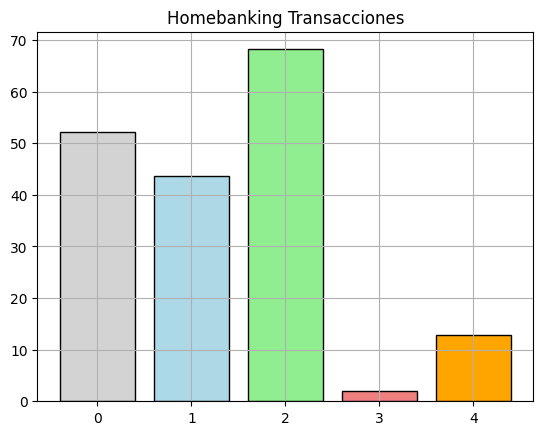

In [185]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["chomebanking_transacciones"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("Homebanking Transacciones")
plt.grid(True)

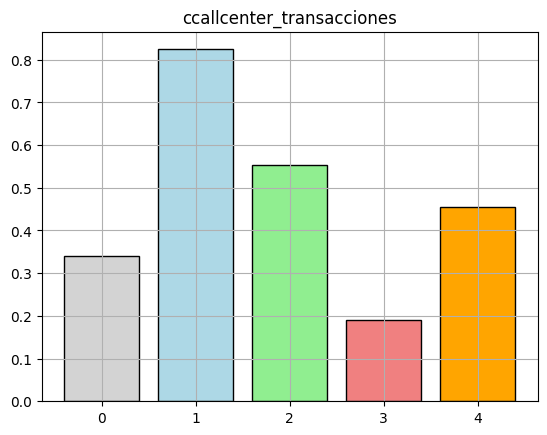

In [187]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["ccallcenter_transacciones"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("ccallcenter_transacciones")
plt.grid(True)

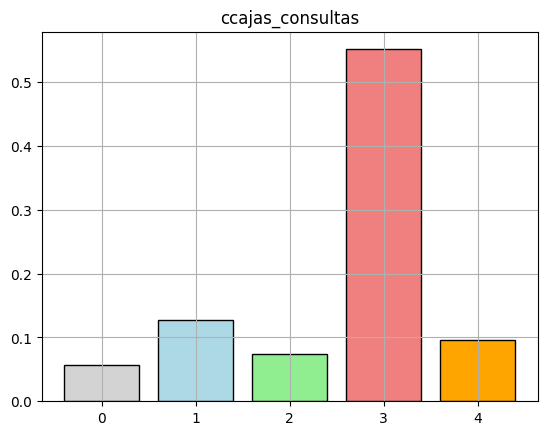

In [189]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["ccajas_consultas"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("ccajas_consultas")
plt.grid(True)

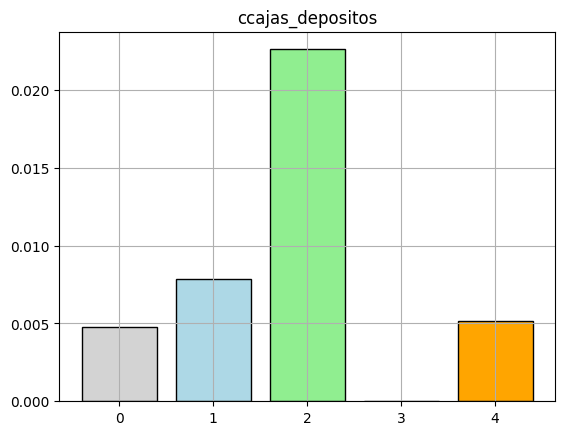

In [191]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["ccajas_depositos"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("ccajas_depositos")
plt.grid(True)

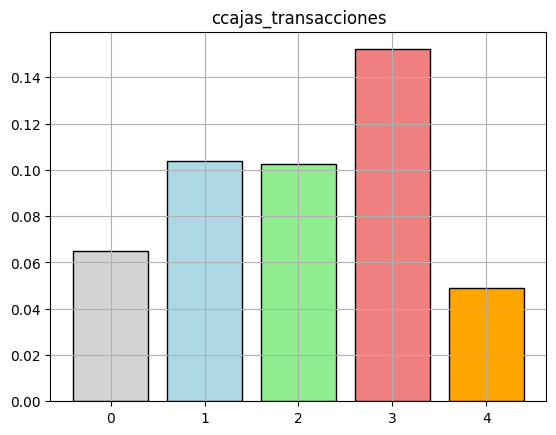

In [192]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["ccajas_transacciones"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("ccajas_transacciones")
plt.grid(True)

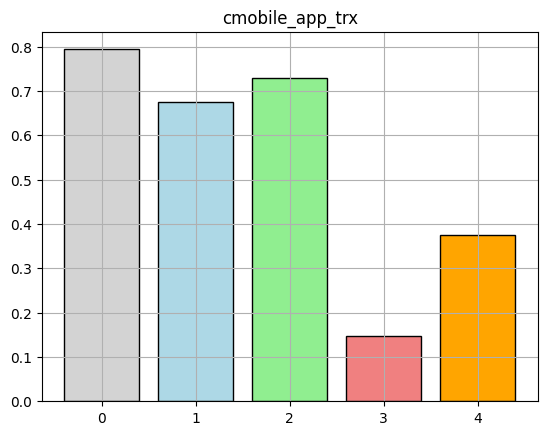

In [193]:
colors = ["lightgray","lightblue","lightgreen","lightcoral","orange"]
mcomisiones_by_cluster=df.groupby("cluster")["cmobile_app_trx"].mean()
plt.bar(mcomisiones_by_cluster.index,mcomisiones_by_cluster.values,color=colors ,edgecolor="black")
plt.title("cmobile_app_trx")
plt.grid(True)